In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
 
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

### 데이터 전처리

In [7]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype(float) / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype(float) / 255

In [8]:
Y_train = utils.to_categorical(Y_train)
Y_test = utils.to_categorical(Y_test)

In [12]:
model = Sequential() # 커널의 값이 w파라미터, b 값 32 마스크 값을 학습
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2)) #특징은 잃어버리지 않고 값을 줄이기위해 사용
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [15]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [16]:
history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    epochs=30, batch_size=200, verbose=0,
                    callbacks=[checkpointer, early_stopping])


Epoch 00001: val_loss improved from inf to 0.05560, saving model to ./model\01-0.0556.hdf5

Epoch 00002: val_loss improved from 0.05560 to 0.04008, saving model to ./model\02-0.0401.hdf5

Epoch 00003: val_loss improved from 0.04008 to 0.03279, saving model to ./model\03-0.0328.hdf5

Epoch 00004: val_loss improved from 0.03279 to 0.02897, saving model to ./model\04-0.0290.hdf5

Epoch 00005: val_loss did not improve from 0.02897

Epoch 00006: val_loss did not improve from 0.02897

Epoch 00007: val_loss did not improve from 0.02897

Epoch 00008: val_loss did not improve from 0.02897

Epoch 00009: val_loss did not improve from 0.02897

Epoch 00010: val_loss improved from 0.02897 to 0.02673, saving model to ./model\10-0.0267.hdf5

Epoch 00011: val_loss improved from 0.02673 to 0.02655, saving model to ./model\11-0.0266.hdf5

Epoch 00012: val_loss did not improve from 0.02655

Epoch 00013: val_loss did not improve from 0.02655

Epoch 00014: val_loss did not improve from 0.02655

Epoch 00015

In [17]:
print(' Test Accuracy: %.4f' % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 3s 11ms/step - loss: 0.0327 - accuracy: 0.9925
 Test Accuracy: 0.9925


In [18]:
y_vloss = history.history['val_loss']

In [19]:
y_loss = history.history['loss']

In [20]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

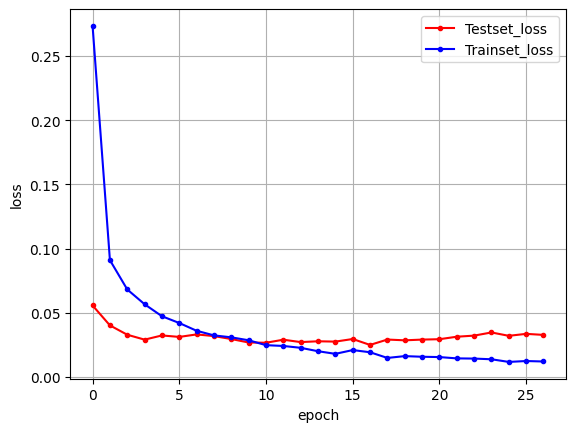

In [21]:
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()